In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("./common/data"))

import tensorflow as tf

with tf.device('/gpu:1'):
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.allow_growth = True
    tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

['chest_xray', 'resampled', 'TEST']


Using TensorFlow backend.


# Resample Data Into New Dataset

# Resample Train Data

In [2]:
from common.src import resample as res

In [3]:
from imblearn.under_sampling import NearMiss

path = r'C:\Users\mmitk\dev\2020\pneumonia\common\data\chest_xray\train'
nm = NearMiss()

In [4]:
res.resample_directory(nm, path, 'NearMiss', val = False)

----------[LOADING IMAGES]----------
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
......................
Finished [LOADING IMAGES]
----------[RESAMPLING IMAGES]----------

Finished [RESAMPLING IMAGES]
----------[WRITING RESAMPLED IMAGES]----------
....................................................................................................
....................................................................................................
.....................................................................
Finished [RESAMPLING

# Load Data

In [5]:
train_folder= './common/data/resampled/NearMiss/train'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

In [6]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

In [7]:
# test
os.listdir(test_folder)
train_n = test_folder+'NORMAL/'
train_p = test_folder+'PNEUMONIA/'

In [8]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/resampled/NearMiss/train')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/', batch_size = 1, shuffle = False) 

Found 2682 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create Model

In [9]:
from common.src import models

cnn = models.CNNModel(patience_s = 19)
cnn.create_model()
cnn.summary()

# Fit Model

In [10]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs=20)

Epoch 1/20
163/163 [==============================] - 12s 74ms/step - loss: 0.4674 - tp: 3959.0000 - fp: 1157.0000 - tn: 4047.0000 - fn: 1245.0000 - accuracy: 0.7692 - precision: 0.7738 - recall: 0.7608 - auc: 0.8580 - val_loss: 0.3581 - val_tp: 228.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 76.0000 - val_accuracy: 0.7812 - val_precision: 0.8000 - val_recall: 0.7500 - val_auc: 0.9297
Epoch 2/20
163/163 [==============================] - 10s 59ms/step - loss: 0.2662 - tp: 4660.0000 - fp: 537.0000 - tn: 4667.0000 - fn: 544.0000 - accuracy: 0.8961 - precision: 0.8967 - recall: 0.8955 - auc: 0.9573 - val_loss: 0.2982 - val_tp: 266.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 38.0000 - val_accuracy: 0.9062 - val_precision: 0.9333 - val_recall: 0.8750 - val_auc: 0.9570
Epoch 3/20
163/163 [==============================] - 9s 58ms/step - loss: 0.2364 - tp: 4751.0000 - fp: 473.0000 - tn: 4737.0000 - fn: 459.0000 - accuracy: 0.9106 - precision: 0.9095 - recall: 0.9119 - auc: 0.9

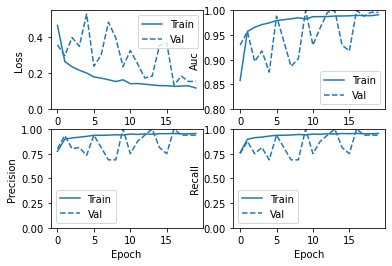

In [11]:
cnn.plot_history()

In [12]:
cnn.get_classification_report(test_set)

              precision    recall  f1-score   support

      NORMAL       0.77      0.86      0.81       234
   PNEUMONIA       0.91      0.85      0.88       390

    accuracy                           0.85       624
   macro avg       0.84      0.85      0.85       624
weighted avg       0.86      0.85      0.85       624



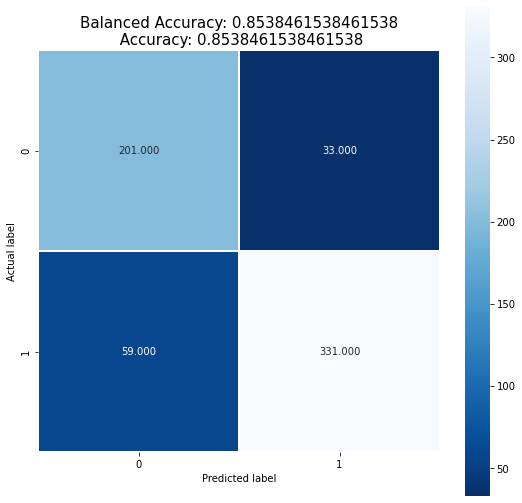

In [13]:
cnn.display_confusion_matrix(test_set)